# Covid-19 (Coronavirus) 
## Tracker for Locations with Friends & Family

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### --PENDING-- US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hopspitalization, ICU stats --PENDING--
- **Historic time series data:**
    - US State testing and hopspitalization, ICU stats --PENDING--

### --PENDING-- US County - Alternative: NY Times
- Link: https://github.com/nytimes/covid-19-data/
- **Historic time series data:**
    - US States (cases, deaths) --PENDING--
    - US Counties (cases, deaths) --PENDING--

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns
sns.set()

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [2]:
jh_live_global = pd.read_csv('Datasets/JH/jh_live_global_orig.csv')

In [3]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [4]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [5]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [6]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [7]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [12]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

** PENDING **

### Dataset 3: New York Times (Alternative Historic US State & County data)

** PENDING **

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [13]:
jh_live_date = jh_live_global['Last_Update'][0]
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-05-03 00:00:00')

In [14]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-05-02 00:00:00')

In [15]:
# Date to zoom in on for charting recent data
zoom_date = '3/15/2020'
zoom_date2 = '3/20/2020'
zoom_date3 = '3/25/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [16]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,3427343
Deaths,243808
Recovered,1093112
Active,2090423


In [17]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(25, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,1132539,66369,175382,890788,2020-05-03 02:32:28,38.159699,-91.079345
Spain,216582,25100,117248,74234,2020-05-03 02:32:28,40.463667,-3.749220
Italy,209328,28710,79914,100704,2020-05-03 02:32:28,41.871940,12.567380
United Kingdom,183500,28205,896,154399,2020-05-03 02:32:28,24.548173,-43.902242
France,168518,24763,50663,93092,2020-05-03 02:32:28,8.314863,-21.695174


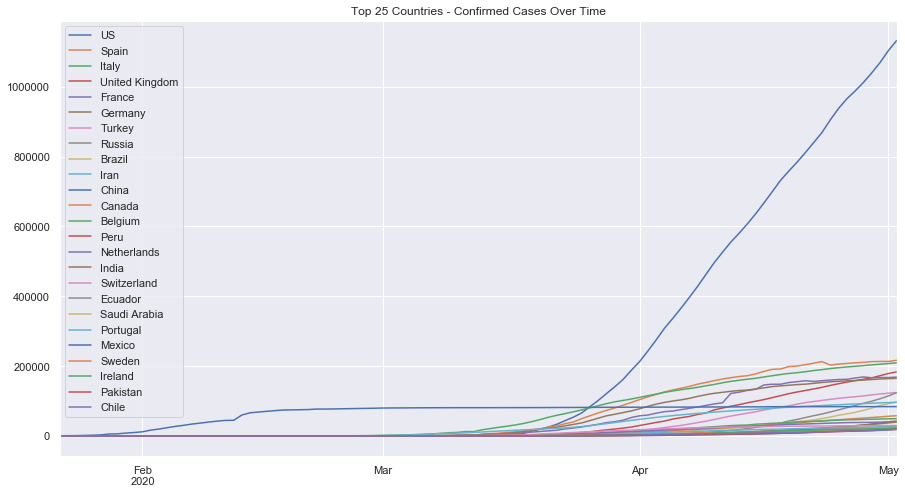

In [18]:
# Plot the top 25 countries confirmed infections over time
jh_hist_countries_cases[top_countries.index].plot(figsize=(15,8), title="Top 25 Countries - Confirmed Cases Over Time")

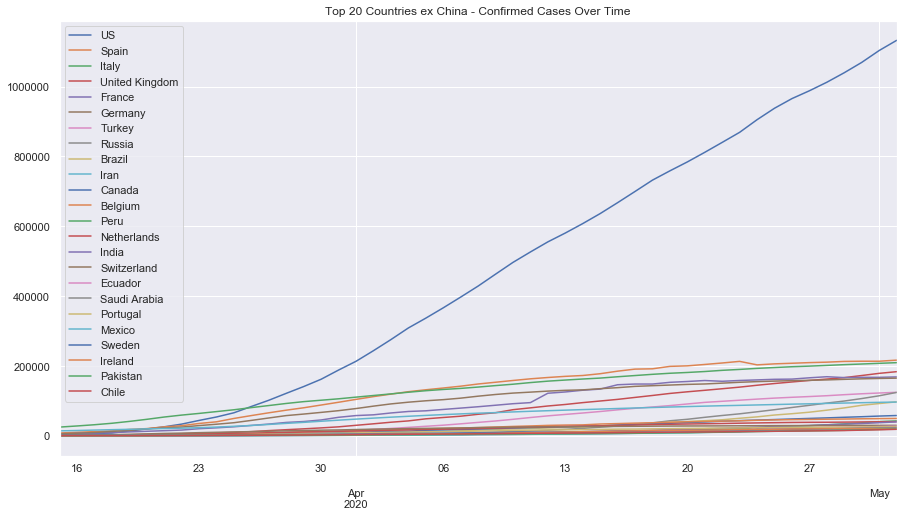

In [19]:
# Same chart but excluding China and starting on Mar 15 to zoom in
jh_hist_countries_cases[top_countries.index].loc[zoom_date:, top_countries.index != 'China'].plot(figsize=(15,8), title="Top 20 Countries ex China - Confirmed Cases Over Time")

### US State Level

In [20]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(20, 'Confirmed')
top_states.head(10)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
New York,312977,24198,0,288779,2020-05-03 02:32:28,42.671593,-75.579694
New Jersey,123717,7742,0,115975,2020-05-03 02:32:28,40.286441,-74.622450
Massachusetts,66263,3846,0,62417,2020-05-03 02:32:28,42.176400,-71.577050
Illinois,58505,2559,0,55946,2020-05-03 02:32:28,39.873158,-89.196477
California,53347,2180,0,51167,2020-05-03 02:32:28,37.638161,-120.690846
Pennsylvania,50494,2695,0,47799,2020-05-03 02:32:28,40.818078,-77.615318
Michigan,43207,4021,0,39186,2020-05-03 02:32:28,43.942073,-85.081655
Florida,35463,1364,0,34099,2020-05-03 02:32:28,28.940755,-82.700744
Texas,30917,863,0,30054,2020-05-03 02:32:28,31.653037,-98.267182


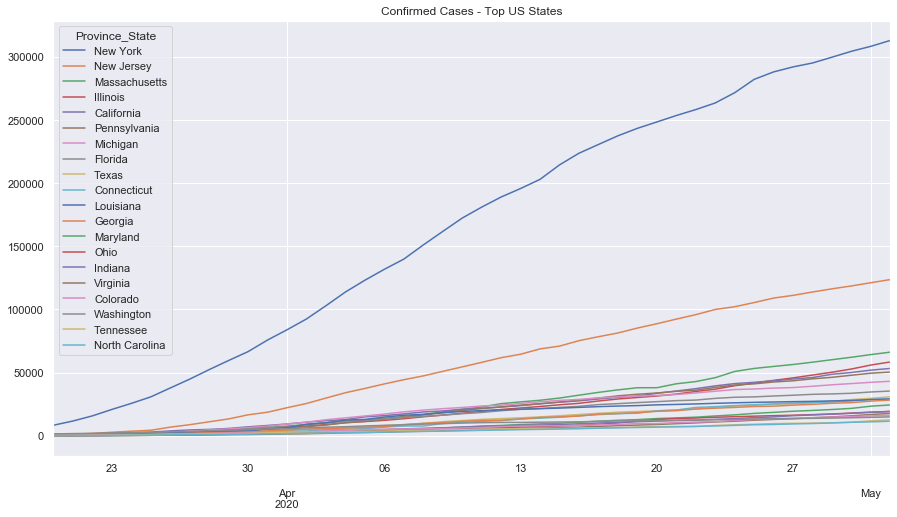

In [21]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date2:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

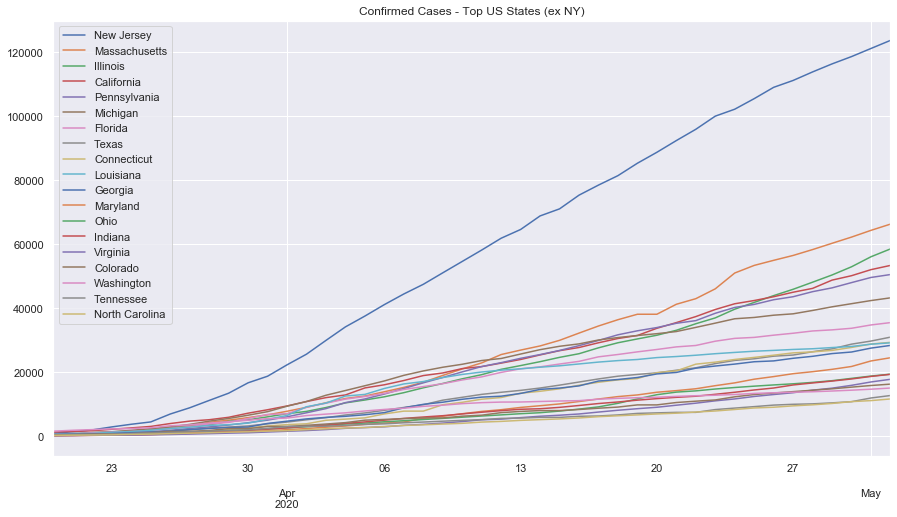

In [22]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_cases[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

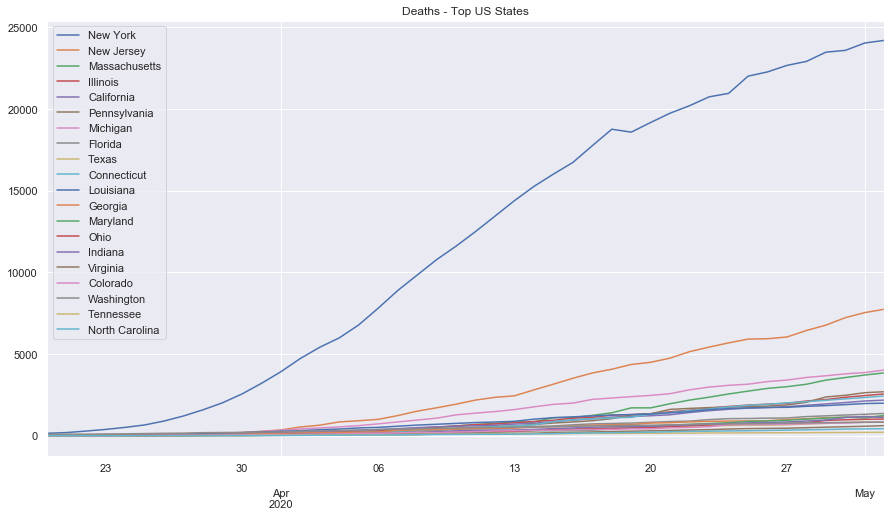

In [23]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, :].plot(title='Deaths - Top US States', figsize=(15,8))

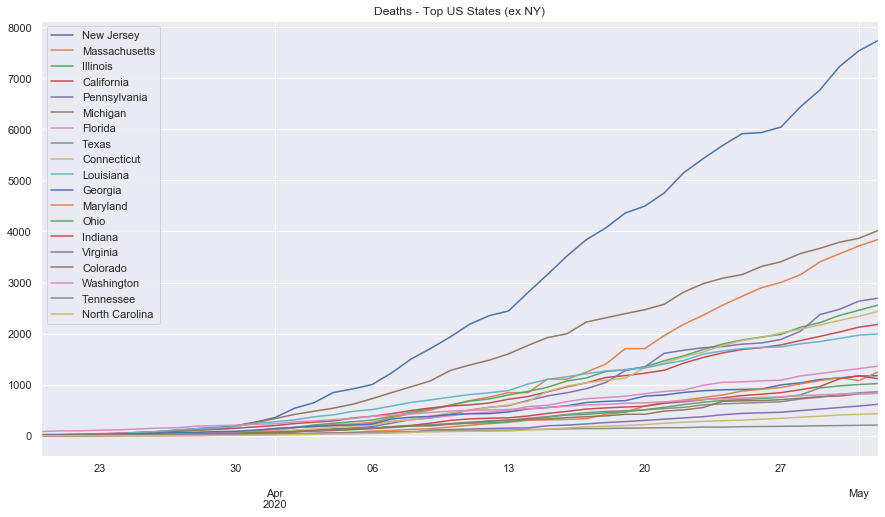

In [24]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [25]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(10, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,15048,923,0,14125,2020-05-03 02:32:28,42.486077,-71.390492,25017.0
Suffolk,13606,569,0,13037,2020-05-03 02:32:28,42.327951,-71.078504,25025.0
Essex,9362,484,0,8878,2020-05-03 02:32:28,42.668763,-70.946872,25009.0
Norfolk,6187,535,0,5652,2020-05-03 02:32:28,42.160731,-71.205304,25021.0
Worcester,6129,292,0,5837,2020-05-03 02:32:28,42.350270,-71.904934,25027.0


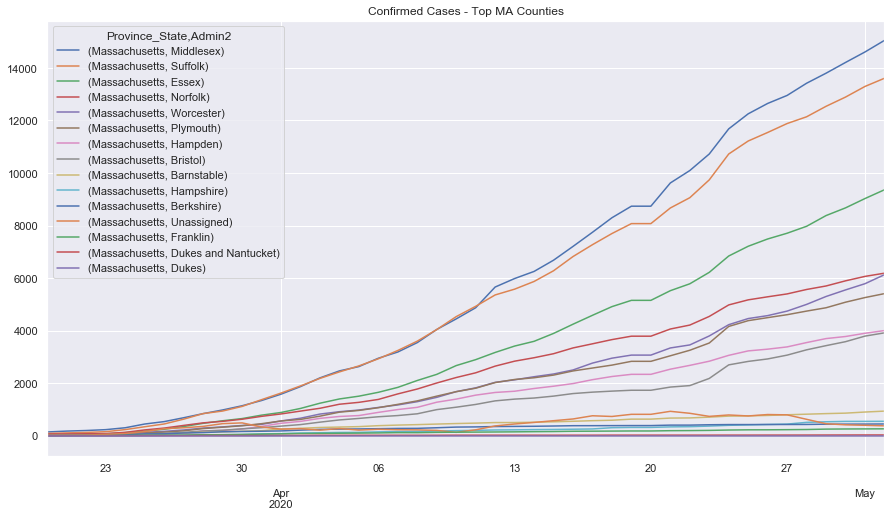

In [26]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(15).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

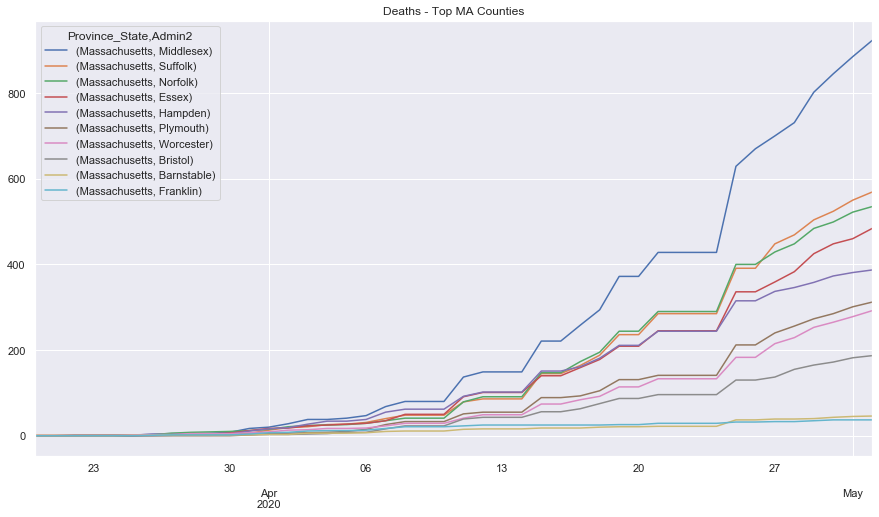

In [27]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(10).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [28]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(15, 'Confirmed')
top_counties_CA.head(7)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,24894,1209,0,23685,2020-05-03 02:32:28,34.308284,-118.228241,6037.0
Riverside,4079,156,0,3923,2020-05-03 02:32:28,33.743150,-115.993358,6065.0
San Diego,3711,134,0,3577,2020-05-03 02:32:28,33.034846,-116.736533,6073.0
Orange,2636,52,0,2584,2020-05-03 02:32:28,33.701475,-117.764600,6059.0
Santa Clara,2205,114,0,2091,2020-05-03 02:32:28,37.231049,-121.697046,6085.0
San Bernardino,2182,97,0,2085,2020-05-03 02:32:28,34.840603,-116.177469,6071.0
Alameda,1706,63,0,1643,2020-05-03 02:32:28,37.646294,-121.892927,6001.0


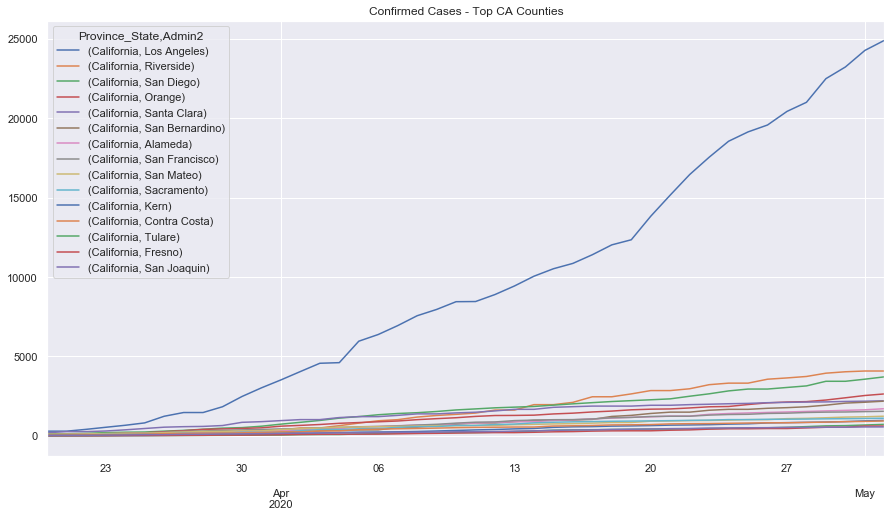

In [29]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

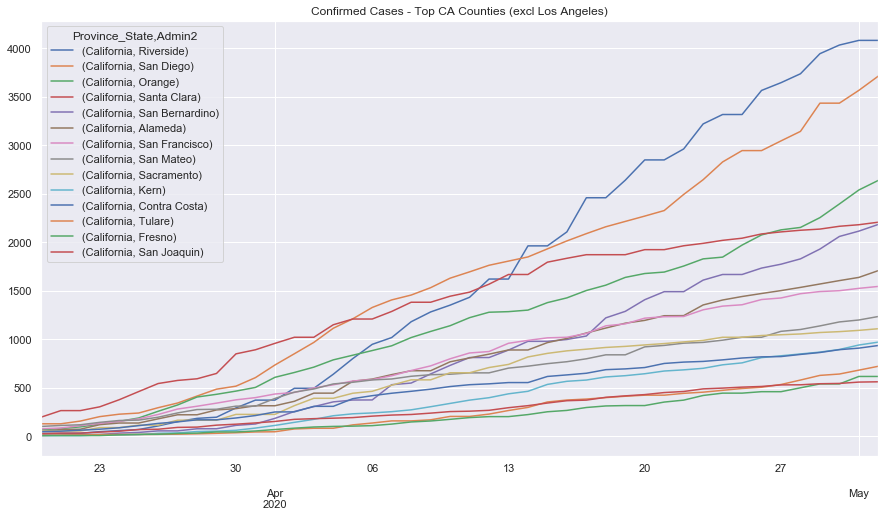

In [30]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

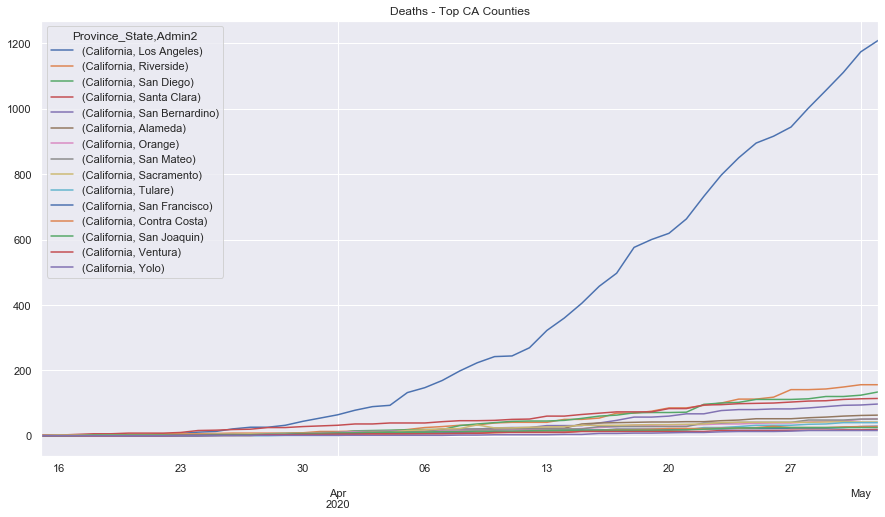

In [31]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

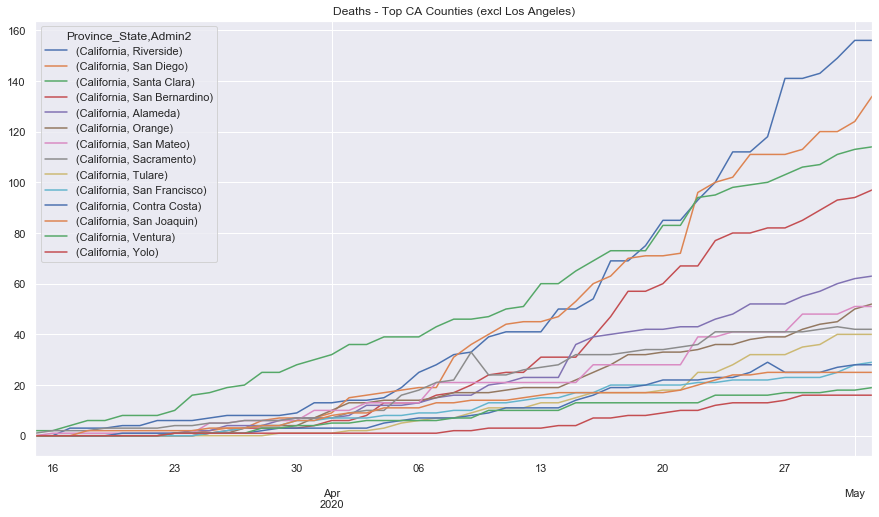

In [32]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [33]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [34]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [35]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [36]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [37]:
# Display all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",2636,52,0,2584,2020-05-03 02:32:28,33.701475,-117.764600
"(Massachusetts, Middlesex)",15048,923,0,14125,2020-05-03 02:32:28,42.486077,-71.390492
"(Massachusetts, Suffolk)",13606,569,0,13037,2020-05-03 02:32:28,42.327951,-71.078504
"(Massachusetts, Essex)",9362,484,0,8878,2020-05-03 02:32:28,42.668763,-70.946872
"(Massachusetts, Bristol)",3916,187,0,3729,2020-05-03 02:32:28,41.792284,-71.108722
Costa Rica,733,6,372,355,2020-05-03 02:32:28,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [38]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [39]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [40]:
# Check the most recent 8 days (week + start)
fnf_hist_cases.tail(8)

Province_State California Massachusetts                       Costa Rica
Admin2             Orange     Middlesex Suffolk Essex Bristol           
2020-04-25           1969         12253   11218  7212    2829        693
2020-04-26           2074         12648   11543  7489    2923        695
2020-04-27           2126         12953   11883  7708    3068        697
2020-04-28           2151         13417   12140  7972    3270        705
2020-04-29           2252         13799   12539  8380    3429        713
2020-04-30           2393         14208   12890  8673    3580        719
2020-05-01           2537         14607   13295  9028    3792        725
2020-05-02           2636         15048   13606  9362    3916        733

In [41]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

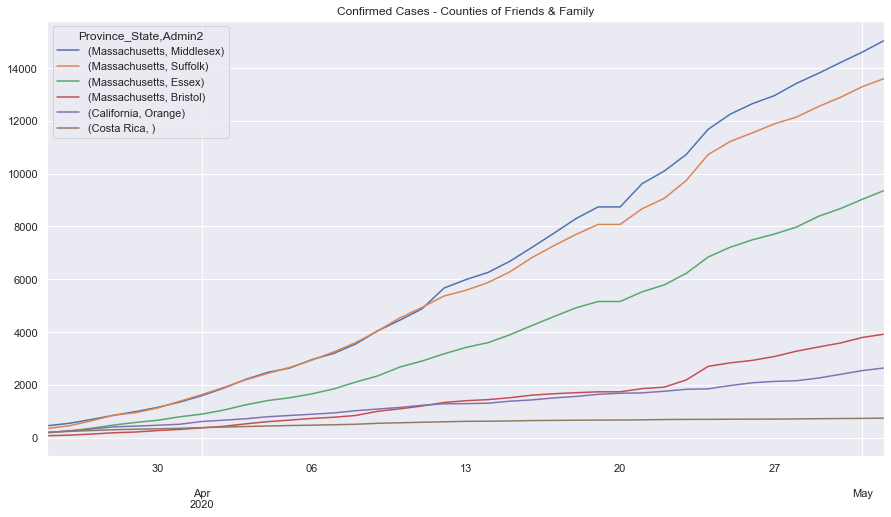

In [42]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date3:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [43]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [44]:
# Add MA "Unassigned" since there are days where deaths are flat on the County level while they are unassigned
fnf_hist_deaths[('Massachusetts', 'Unassigned')] = jh_hist_uscounties_deaths.loc[:, ('Massachusetts', 'Unassigned') ]

In [45]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [46]:
# Check the most recent 8 days (week + start)
fnf_hist_deaths.tail(8)

Province_State California Massachusetts                                   \
Admin2             Orange     Middlesex Suffolk Essex Bristol Unassigned   
2020-04-25             38           629     391   336     130         13   
2020-04-26             39           670     391   336     130        141   
2020-04-27             39           700     448   359     137          8   
2020-04-28             42           731     469   383     155          5   
2020-04-29             44           802     504   425     165          5   
2020-04-30             45           845     524   448     172          5   
2020-05-01             50           885     550   460     182          6   
2020-05-02             52           923     569   484     187          4   

Province_State Costa Rica  
Admin2                     
2020-04-25              6  
2020-04-26              6  
2020-04-27              6  
2020-04-28              6  
2020-04-29              6  
2020-04-30              6  
2020-05-01              6  
2020-05-02              6

In [47]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

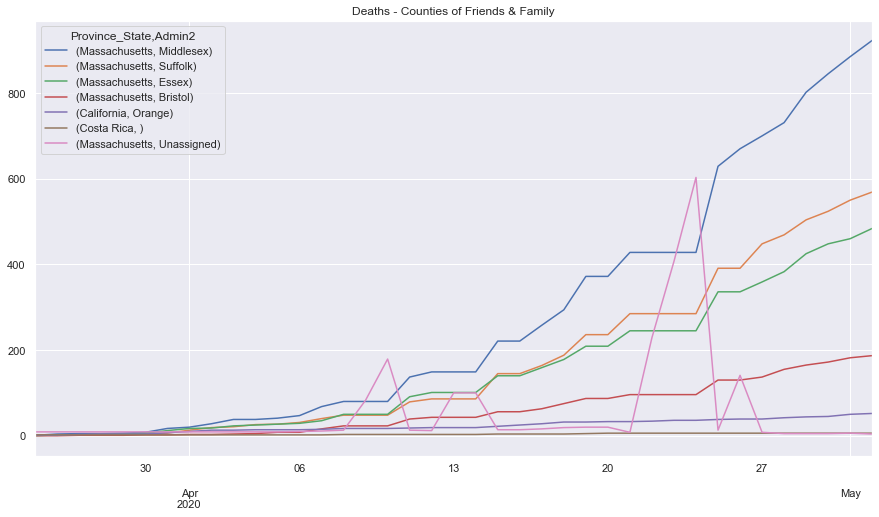

In [48]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date3:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))